# E-commerce dataset Analysis

Please check the last section #insights to read the key insights derived from the data.

## Loading Data

In [ ]:
# Load Google Drive into Colab #

from google.colab import drive
drive.mount('/content/drive')

# Load Packages #

import os

import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSCI599/UCI Dataset/UCI E - Commerce.csv', encoding='latin')

In [ ]:
df = df.loc[df['Quantity'] > 0 ]
df = df.loc[df['UnitPrice'] > 0.01 ]
df = df.loc[df['CustomerID'].notnull() ]
df = df.loc[-(df['Description'].str.contains("POSTAGE"))]
df = df.loc[-(df['Description'].str.contains("Manual"))]

In [ ]:
df.shape[0]

In [ ]:
df.to_csv('filtered_uci.csv')

In [ ]:
df.head()

In [ ]:
# Most "Invoiced Item"

df['Description'].value_counts().head(20)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
PACK OF 72 RETROSPOT CAKE CASES       1068
PAPER CHAIN KIT 50'S CHRISTMAS        1019
SPOTTY BUNTING                        1017
LUNCH BAG SPACEBOY DESIGN             1008
LUNCH BAG CARS BLUE                    989
HEART OF WICKER SMALL                  985
NATURAL SLATE HEART CHALKBOARD         980
LUNCH BAG PINK POLKADOT                957
REX CASH+CARRY JUMBO SHOPPER           952
LUNCH BAG SUKI DESIGN                  933
ALARM CLOCK BAKELIKE RED               899
LUNCH BAG APPLE DESIGN                 895
Name: Description, dtype: int64

In [ ]:
# Most Commonly Purchased by Revenues #

df['Revenue'] = df['Quantity']*df['UnitPrice']

temp = pd.pivot_table(data = df,
                      index = 'Description',
                      values = 'Revenue',
                      aggfunc = np.sum).reset_index().sort_values("Revenue", ascending = False)

temp['Total Revenue'] = temp['Revenue'].sum()

temp['Share'] = (temp['Revenue'] / temp['Total Revenue'])*100

temp.sort_values("Revenue", ascending = False).head(20)

,Description,Revenue,Total Revenue,Share
2316,"PAPER CRAFT , LITTLE BIRDIE",168469.60,8767917.65,1.921432
2763,REGENCY CAKESTAND 3 TIER,142592.95,8767917.65,1.626303
3694,WHITE HANGING HEART T-LIGHT HOLDER,100448.15,8767917.65,1.145633
1761,JUMBO BAG RED RETROSPOT,85220.78,8767917.65,0.971961
1991,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,8767917.65,0.928575
2342,PARTY BUNTING,68844.33,8767917.65,0.785184
216,ASSORTED COLOUR BIRD ORNAMENT,56580.34,8767917.65,0.645311
2652,RABBIT NIGHT LIGHT,51346.20,8767917.65,0.585615
722,CHILLI LIGHTS,46286.51,8767917.65,0.527908
2310,PAPER CHAIN KIT 50'S CHRISTMAS,42660.83,8767917.65,0.486556


In [ ]:
df['Quantity'].describe()

In [ ]:
df.sort_values("Quantity").head(5)

In [ ]:
# Most Commonly Purchased by Revenues #

df['Revenue'] = df['Quantity']*df['UnitPrice']

temp = pd.pivot_table(data = df,
                      index = 'Description',
                      values = 'Revenue',
                      aggfunc = np.sum).reset_index().sort_values("Revenue", ascending = False)

temp['Total Revenue'] = temp['Revenue'].sum()

temp['Share'] = (temp['Revenue'] / temp['Total Revenue'])*100

temp.sort_values("Revenue", ascending = False)

revenuedata = temp.copy()

# Most Commonly Purchased by Price #

pricedata = pd.pivot_table(data = df,
                        index = 'Description',
                        values = 'UnitPrice',
                        aggfunc = np.max).reset_index().sort_values('UnitPrice', ascending = False)

# Combine Data #

Combined = revenuedata.merge(pricedata,
                             on = 'Description')

Combined = Combined.sort_values("UnitPrice", ascending = False)

## Further Analysis

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df['Description'].value_counts().head(20)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
PACK OF 72 RETROSPOT CAKE CASES       1068
PAPER CHAIN KIT 50'S CHRISTMAS        1019
SPOTTY BUNTING                        1017
LUNCH BAG SPACEBOY DESIGN             1008
LUNCH BAG CARS BLUE                    989
HEART OF WICKER SMALL                  985
NATURAL SLATE HEART CHALKBOARD         980
LUNCH BAG PINK POLKADOT                957
REX CASH+CARRY JUMBO SHOPPER           952
LUNCH BAG SUKI DESIGN                  933
ALARM CLOCK BAKELIKE RED               899
LUNCH BAG APPLE DESIGN                 895
Name: Description, dtype: int64

### Demographic Segmentation

In [ ]:
country_counts = df['Country'].value_counts()
print("Customer distribution by country:\n", country_counts)

Customer distribution by country:
 United Kingdom          354026
Germany                   8658
France                    8036
EIRE                      7234
Spain                     2422
Netherlands               2322
Belgium                   1935
Switzerland               1810
Portugal                  1425
Australia                 1181
Norway                    1048
Channel Islands            747
Italy                      741
Finland                    647
Cyprus                     612
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     248
Unspecified                244
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Leba

Astronomically high number of customers from the UK


### Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# K-means Clustering: Data Preparation
df2=df.copy()
df2 = df2[df2['Revenue'] <= 30000]

selected_columns = ['Quantity', 'UnitPrice', 'Revenue']
df2 = df2.dropna(subset=selected_columns)

# features = df2[['Quantity', 'UnitPrice', 'Revenue']]
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

# k = 4

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=k, random_state=42)
# df2['Cluster'] = kmeans.fit_predict(features_scaled)

In [ ]:
# K-means Clustering: Data Preparation
# features = df[['Quantity', 'UnitPrice', 'Revenue']]
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

# k = 4

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=k, random_state=42)
# df['Cluster'] = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Convert 'InvoiceDate' to datetime format
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], errors='coerce')

# Additional Features
df2['DayOfWeek'] = df2['InvoiceDate'].dt.dayofweek
df2['Year'] = df2['InvoiceDate'].dt.year
df2['TotalPrice'] = df2['Quantity'] * df2['UnitPrice']

# Invoice-related features
df2['UniqueItemsPerInvoice'] = df2.groupby('InvoiceNo')['StockCode'].transform('nunique')
df2['TotalPricePerInvoice'] = df2.groupby('InvoiceNo')['Revenue'].transform('sum')

# Seasonality features
df2['Month'] = df2['InvoiceDate'].dt.month
month_counts = df2['Month'].value_counts().sort_index()
print("Monthly purchase frequency:\n", month_counts)

# Transaction-related features
total_transactions_per_customer = df2.groupby('CustomerID')['InvoiceNo'].nunique()
df2['TotalTransactions'] = df2['CustomerID'].map(total_transactions_per_customer)

# Duration between the first and last purchase for each customer
customer_purchase_dates = df2.groupby('CustomerID')['InvoiceDate']
df2['FirstPurchaseDate'] = customer_purchase_dates.transform('min')
df2['LastPurchaseDate'] = customer_purchase_dates.transform('max')
df2['PurchaseDuration'] = (df2['LastPurchaseDate'] - df2['FirstPurchaseDate']).dt.days


# Select relevant features for clustering
additional_features = df2[['UniqueItemsPerInvoice', 'TotalPricePerInvoice', 'Month', 'TotalTransactions', 'DayOfWeek', 'Month', 'Year', 'TotalPrice', 'PurchaseDuration']]

Monthly purchase frequency:
 1     21141
2     19855
3     27069
4     22563
5     28217
6     27089
7     26729
8     26907
9     39889
10    49383
11    64325
12    43311
Name: Month, dtype: int64


In [ ]:
## final and only clustering run on all features together
features = df2[['Quantity', 'UnitPrice', 'Revenue']]
all_features = pd.concat([features, additional_features], axis=1)
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df2['Cluster'] = kmeans.fit_predict(all_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


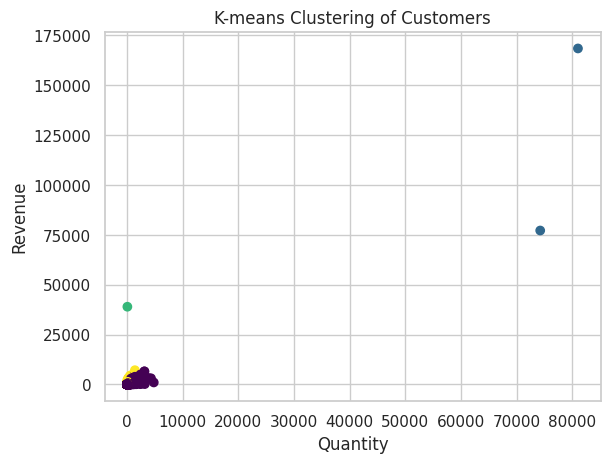

In [ ]:
# Visualize K-means clustering results
plt.scatter(df['Quantity'], df['Revenue'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

Better visualization after removing outliers

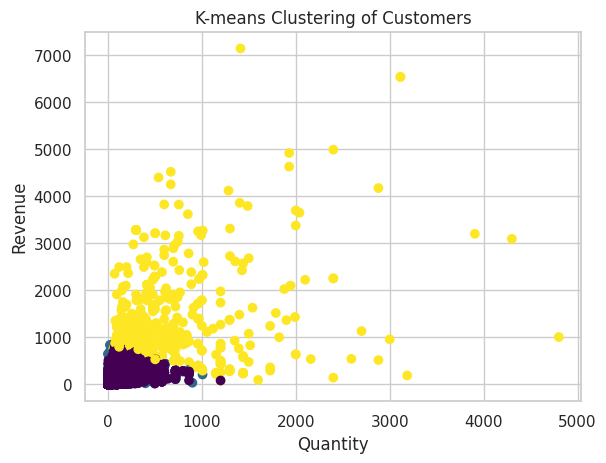

In [ ]:
# Visualize K-means clustering results
plt.scatter(df2['Quantity'], df2['Revenue'], c=df2['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

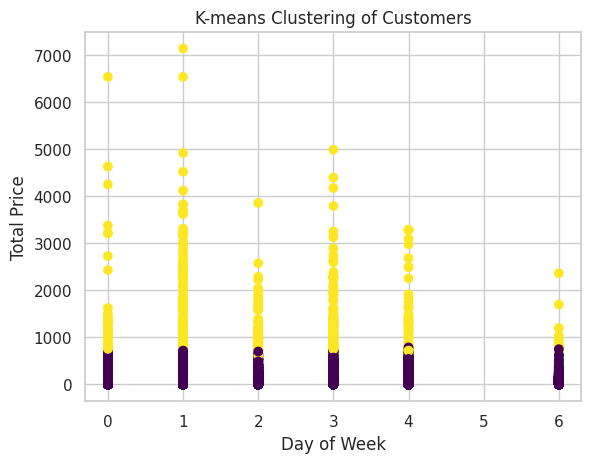

In [ ]:
# Visualize K-means clustering results
plt.scatter(df2['DayOfWeek'], df2['TotalPrice'], c=df2['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Day of Week')
plt.ylabel('Total Price')
plt.show()

0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday

No recorded sales on Saturday

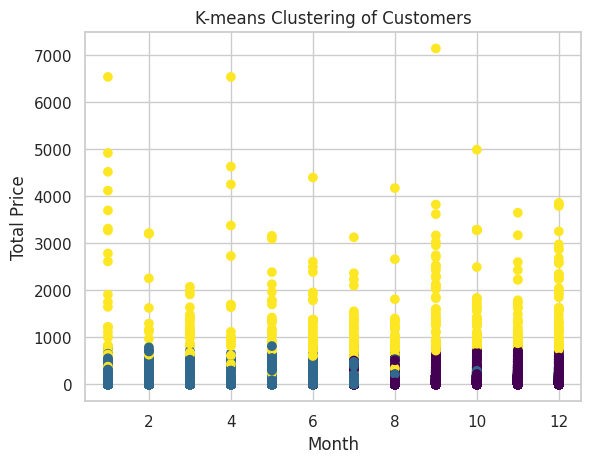

In [ ]:
plt.scatter(df2['Month'], df2['TotalPrice'], c=df2['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

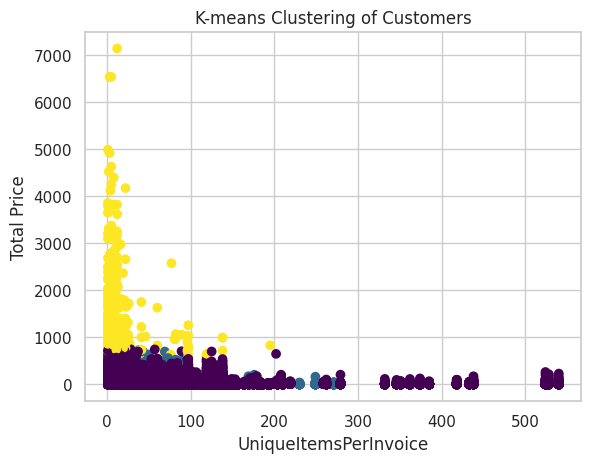

In [ ]:
plt.scatter(df2['UniqueItemsPerInvoice'], df2['TotalPrice'], c=df2['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('UniqueItemsPerInvoice')
plt.ylabel('Total Price')
plt.show()

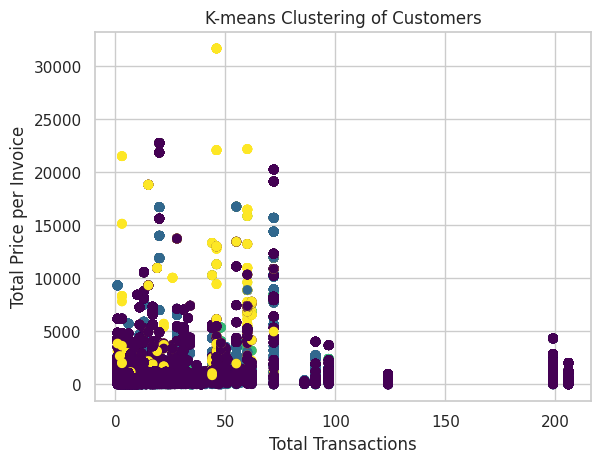

In [ ]:
# Visualize K-means clustering results
# Customize the visualization based on your analysis
plt.scatter(df2['TotalTransactions'], df2['TotalPricePerInvoice'], c=df2['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Total Transactions')
plt.ylabel('Total Price per Invoice')
plt.show()

In [ ]:
sns.set(style="whitegrid")

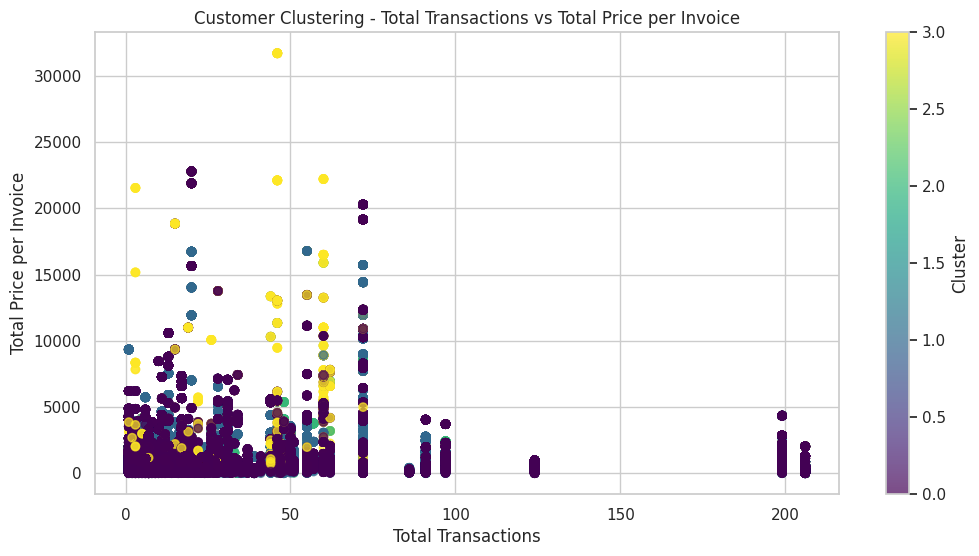

In [ ]:
# Scatter plot: TotalTransactions vs TotalPricePerInvoice
plt.figure(figsize=(12, 6))
plt.scatter(df2['TotalTransactions'], df2['TotalPricePerInvoice'], c=df2['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Clustering - Total Transactions vs Total Price per Invoice')
plt.xlabel('Total Transactions')
plt.ylabel('Total Price per Invoice')
plt.colorbar(label='Cluster')
plt.show()

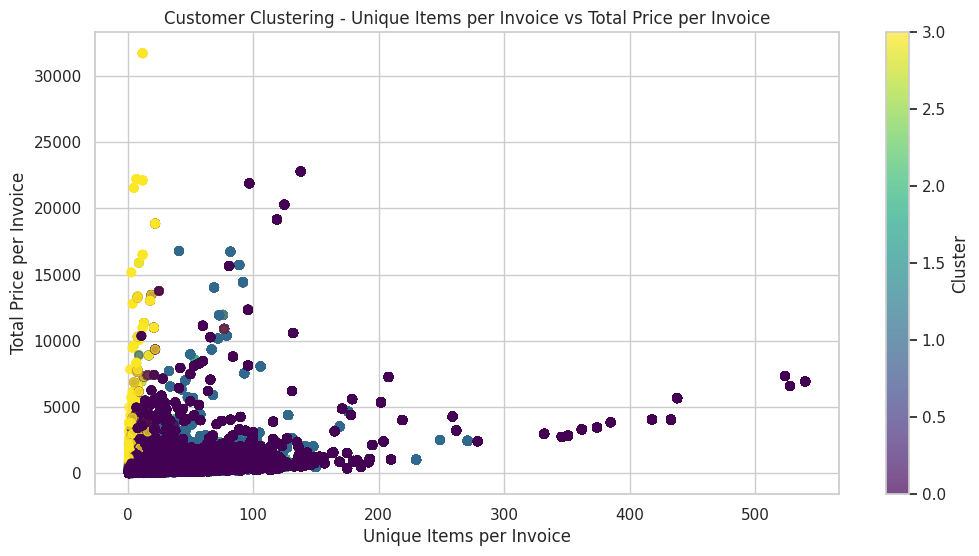

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df2['UniqueItemsPerInvoice'], df2['TotalPricePerInvoice'], c=df2['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Clustering - Unique Items per Invoice vs Total Price per Invoice')
plt.xlabel('Unique Items per Invoice')
plt.ylabel('Total Price per Invoice')
plt.colorbar(label='Cluster')
plt.show()

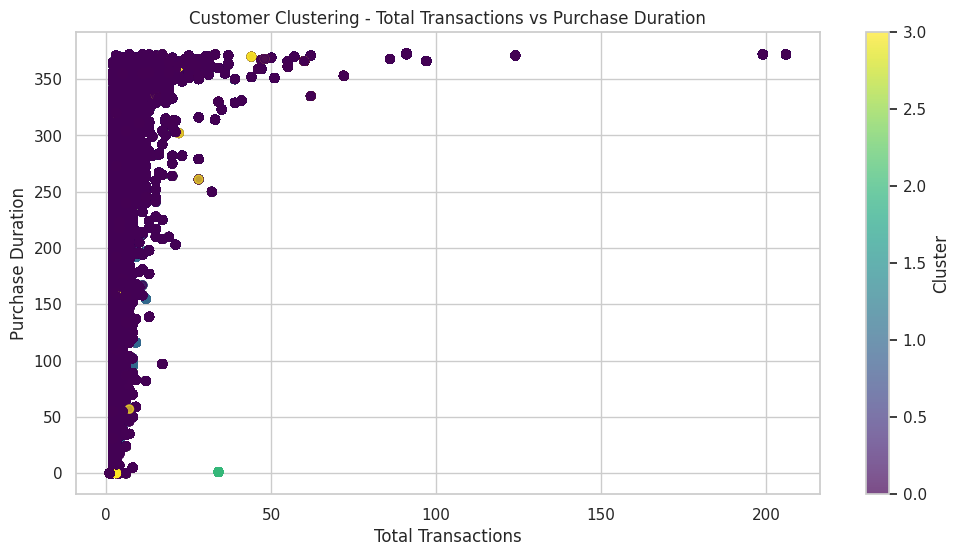

In [ ]:
# Scatter plot: TotalTransactions vs PurchaseDuration
plt.figure(figsize=(12, 6))
plt.scatter(df2['TotalTransactions'], df2['PurchaseDuration'], c=df2['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Clustering - Total Transactions vs Purchase Duration')
plt.xlabel('Total Transactions')
plt.ylabel('Purchase Duration')
plt.colorbar(label='Cluster')
plt.show()

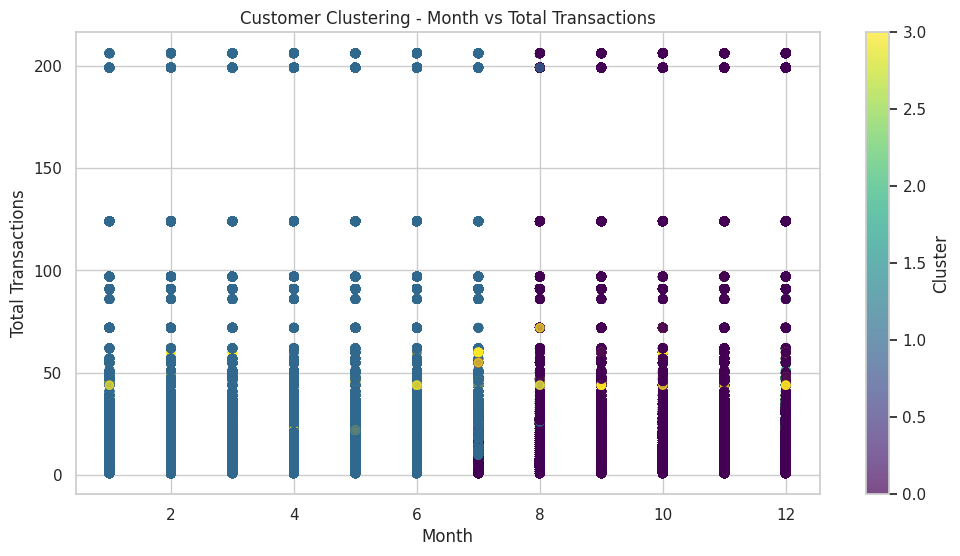

In [ ]:
# Scatter plot: Month vs TotalTransactions
plt.figure(figsize=(12, 6))
plt.scatter(df2['Month'], df2['TotalTransactions'], c=df2['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Clustering - Month vs Total Transactions')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.colorbar(label='Cluster')
plt.show()

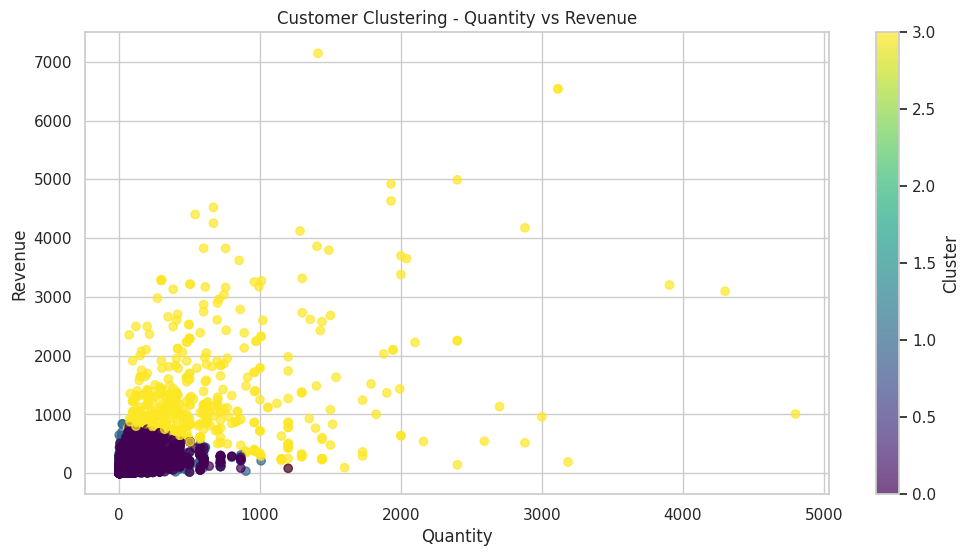

In [ ]:
# Scatter plot: Quantity vs Revenue
plt.figure(figsize=(12, 6))
plt.scatter(df2['Quantity'], df2['Revenue'], c=df2['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Clustering - Quantity vs Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.colorbar(label='Cluster')
plt.show()

### RFM Analysis

In [ ]:
# RFM Analysis
# Assuming 'InvoiceDate' is in datetime format
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
today = max(df2['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary values
recency = (today - df2.groupby('CustomerID')['InvoiceDate'].max()).dt.days
frequency = df2.groupby('CustomerID').size()
monetary = df2.groupby('CustomerID')['Revenue'].sum()

# Combine RFM values into a new DataFrame
rfm_df2 = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# Assign RFM scores based on quantiles
rfm_df2['R_Score'] = pd.qcut(rfm_df2['Recency'], q=4, labels=False)
rfm_df2['F_Score'] = pd.qcut(rfm_df2['Frequency'], q=4, labels=False)
rfm_df2['M_Score'] = pd.qcut(rfm_df2['Monetary'], q=4, labels=False)

# Analyze RFM segments
rfm_df2['RFM_Segment'] = rfm_df2['R_Score'].astype(str) + rfm_df2['F_Score'].astype(str) + rfm_df2['M_Score'].astype(str)
rfm_segment_counts = rfm_df2['RFM_Segment'].value_counts()
print("RFM Segment distribution:\n")
print(rfm_segment_counts)

RFM Segment distribution:

033    448
300    384
133    213
311    204
200    182
222    171
122    169
211    155
022    150
111    133
100    120
301    105
233    104
310     99
212     91
023     88
032     87
132     84
201     80
011     77
322     72
121     70
000     68
223     55
210     55
221     54
123     54
110     51
321     48
112     45
021     43
012     43
232     37
101     36
320     35
312     34
202     27
010     27
120     25
302     24
131     24
001     24
220     22
333     21
332     21
013     20
213     16
002     14
031     14
102     14
203     13
020     13
113     12
231     12
323     12
303      9
313      7
103      7
003      5
331      4
030      3
Name: RFM_Segment, dtype: int64


### Product Analysis

In [ ]:
popular_products_quantity = df2.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("Top 10 Popular Products by Quantity Sold:\n", popular_products_quantity.head(10))


Top 10 Popular Products by Quantity Sold:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25345
PACK OF 60 PINK PAISLEY CAKE CASES    24264
Name: Quantity, dtype: int64


In [ ]:
popular_products_revenue = df2.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
print("Top 10 Popular Products by Revenue:\n", popular_products_revenue.head(10))



Top 10 Popular Products by Revenue:
 Description
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
RABBIT NIGHT LIGHT                     51346.20
CHILLI LIGHTS                          46286.51
PAPER CHAIN KIT 50'S CHRISTMAS         42660.83
BLACK RECORD COVER FRAME               39064.55
JUMBO BAG PINK POLKADOT                37289.59
Name: Revenue, dtype: float64


### Time Analysis

In [ ]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2.set_index('InvoiceDate', inplace=True)

# Daily sales trend
daily_sales = df2.resample('D')['Revenue'].sum()
print("Daily Sales Trend:\n", daily_sales.head())

# Weekly sales trend
weekly_sales = df2.resample('W')['Revenue'].sum()
print("Weekly Sales Trend:\n", weekly_sales.head())

# Monthly sales trend
monthly_sales = df2.resample('M')['Revenue'].sum()
print("Monthly Sales Trend:\n", monthly_sales.head())


Daily Sales Trend:
 InvoiceDate
2010-12-01    46269.29
2010-12-02    47298.53
2010-12-03    23576.01
2010-12-04        0.00
2010-12-05    31315.64
Freq: D, Name: Revenue, dtype: float64
Weekly Sales Trend:
 InvoiceDate
2010-12-05    148459.47
2010-12-12    211707.33
2010-12-19    162353.41
2010-12-26     45535.51
2011-01-02         0.00
Freq: W-SUN, Name: Revenue, dtype: float64
Monthly Sales Trend:
 InvoiceDate
2010-12-31    568055.72
2011-01-31    487058.04
2011-02-28    443546.02
2011-03-31    585262.85
2011-04-30    455681.91
Freq: M, Name: Revenue, dtype: float64


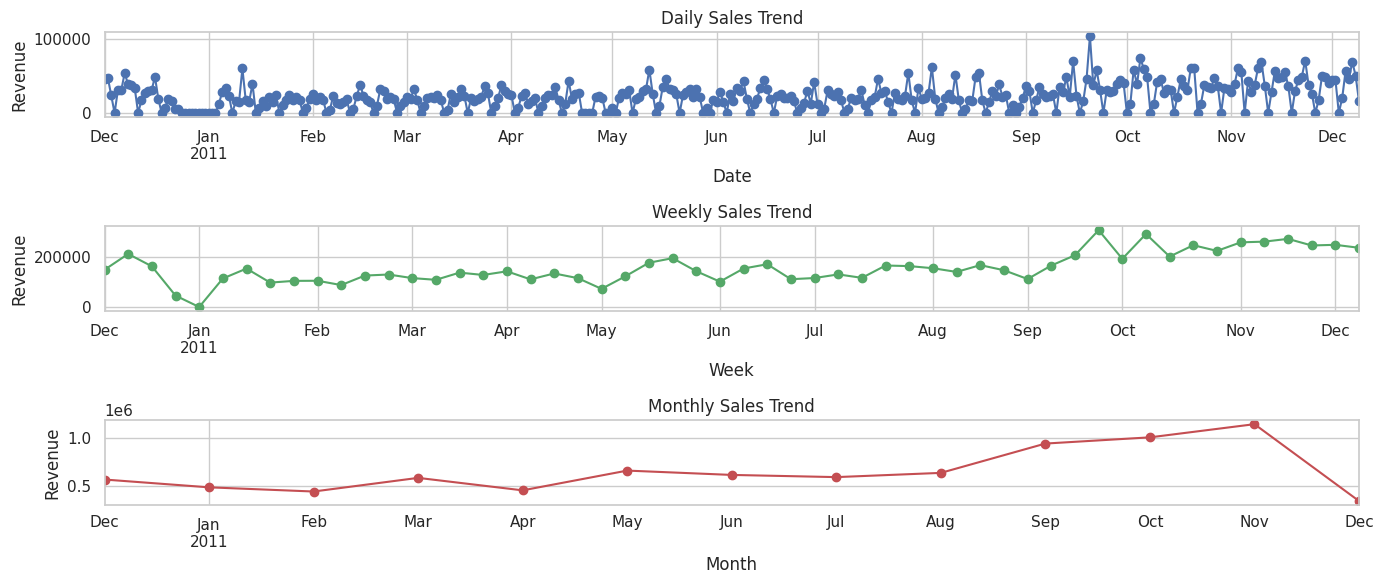

In [ ]:
# Plotting the Daily Sales Trend
plt.figure(figsize=(14, 6))
plt.subplot(3, 1, 1)
daily_sales.plot(marker='o', linestyle='-', color='b')
plt.title('Daily Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)

# Plotting the Weekly Sales Trend
plt.subplot(3, 1, 2)
weekly_sales.plot(marker='o', linestyle='-', color='g')
plt.title('Weekly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Week')
plt.grid(True)

# Plotting the Monthly Sales Trend
plt.subplot(3, 1, 3)
monthly_sales.plot(marker='o', linestyle='-', color='r')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Country Analysis

In [ ]:
country_sales = df2.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print("Sales Performance by Country:\n", country_sales)


Sales Performance by Country:
 Country
United Kingdom          6982879.03
Netherlands              283889.34
EIRE                     262171.56
Germany                  205569.89
France                   184077.68
Australia                138171.31
Spain                     55725.11
Switzerland               52441.95
Japan                     37416.37
Belgium                   36927.34
Sweden                    36839.33
Norway                    32454.64
Portugal                  26707.95
Channel Islands           20157.44
Finland                   18344.88
Denmark                   18211.34
Italy                     15820.24
Cyprus                    13254.69
Singapore                  9120.39
Austria                    8742.68
Israel                     7221.69
Poland                     6974.65
Greece                     4425.52
Iceland                    4310.00
USA                        3580.39
Canada                     3115.44
Unspecified                2667.07
Malta           

## Insights


Geographical Patterns:

Dominant Market: United Kingdom: The UK market exhibits robust presence; however, there's a note of caution regarding potential market concentration.

Emerging Markets: Germany and France: Encouragingly, Germany and France showcase substantial engagement, signaling ripe opportunities for focused marketing and potential expansion.


Time-Based Trends:

Peak Shopping Period: November to December: The holiday season brings a significant uptick in sales and frequency, making it a pivotal time for launching promotions or new products.

Sales Volatility: Day-to-day sales fluctuations are observed, aligning with typical daily variations in customer behavior.

Weekly Trend: Smoothing out volatility, the weekly trend reveals a consistent upward trajectory, suggesting a gradual increase in sales over the year.

Monthly Stability with Year-end Peak: Monthly trends remain stable, with a notable peak at year-end, underscoring a strong performance during the holiday season.

Dips in Trends: Periods of decline in weekly and monthly trends prompt a reassessment of sales strategies to identify contributing factors.

Product Insights:

Top-Selling Product: Regency Cakestand 3 Tier: This product commands both high quantity sold and revenue, pointing to sustained demand.

High Margin Products: Specialized Gift Items: Custom-made gifts contribute significantly to revenue, capitalizing on their higher margins.

"WORLD WAR 2 GLIDERS ASSTD DESIGNS" leads in quantity but not in revenue, suggesting a low price point. In contrast, "REGENCY CAKESTAND 3 TIER" generates the highest revenue, indicating a higher price point or margin. This highlights the importance of balancing volume sales with high-margin products.


Specific Insights from RFM Segments:

033 Segment: The most populous, indicating customers with past purchases but recent inactivity, necessitating re-engagement strategies.

High-Frequency Segments like 300: Suggests the presence of newly acquired customers, presenting opportunities for tailored engagement.

Presence of Segments like 111: Moderate engagement across all fronts signals growth areas for customer engagement strategies.

This suggests opportunities for targeted marketing strategies to increase loyalty and spending among various customer segments.

Cluster Insights:

Quantity vs. Revenue Scatter Plot:

- Purple Cluster: Predominant, indicating customers with smaller purchases generating lower revenue.

- Yellow Cluster: Represents bulk buyers or high-value customers with higher quantities and revenues.

Day of the Week vs. Total Price:

- Purple Cluster: Consistent daily transactions.
- Yellow Cluster: Spikes on certain days, implying potentially profitable days or successful promotions.

Month vs. Total Price:

- Purple Cluster: Consistent buyer behavior.
- Yellow Cluster: Indicates months with higher spending, possibly tied to seasonal sales or promotional activities.

Unique Items per Invoice vs. Total Price per Invoice:

- Purple Cluster: Emphasizes customers buying fewer unique items and spending less.
- Yellow Cluster: Indicates a segment purchasing a wider variety, spending more—possibly more engaged or diverse buyers.

Month vs. Total Transactions:

- Purple Cluster: Fairly consistent transactions monthly.
- Yellow Cluster: Highlights periods with increased transaction volumes, warranting investigation into seasonal effects or successful marketing campaigns.

Strategic Considerations:

- Targeted Marketing for Yellow Cluster: Focus on this high-value or high-engagement segment for tailored marketing efforts.

- Optimizing Seasonal Spikes: Investigate causes of seasonal sales peaks beyond holidays to fine-tune inventory and marketing strategies.

- Conversion Strategies for Purple Cluster: Explore initiatives to transition customers from the predominant purple cluster into higher spending brackets.

- Strategic Day and Month Alignment: Align promotions and stock according to days and months exhibiting higher sales for effective marketing strategies.